In [24]:
import itertools
import math
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline


def distance(coords):
    distance = 0
    for p1, p2 in zip(coords[:-1], coords[1:]):
        distance += ((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2) ** 0.5
    return distance


def new_path(existing_path):
    path = existing_path[:]
    point = random.randint(0, len(path)-2)
    path[point+1], path[point] = path[point], path[point+1]
    return path


def simulated_annealing_optimizer(starting_path, cost_func, new_path_func, start_temp, min_temp, steps):
    current_path = starting_path[:]
    current_cost = cost_func(current_path)
    temp_factor = -np.log(start_temp / min_temp)
    history = []
    for s in range(0, steps):
        temp = start_temp * np.exp(temp_factor * s / steps)
        new_path = new_path_func(current_path)
        new_cost = cost_func(new_path)
        if (new_cost < current_cost) or (random.random() <= np.exp(-(new_cost - current_cost)/temp)):
            current_path = new_path
            current_cost = new_cost
        record = {'step':s, 'temperature':temp, 'current_cost':current_cost, }
        history.append(record)
    return (current_path, current_cost, history)

In [25]:
def new_path_random(existing_path):
    path = existing_path[:]
    point1 = random.randint(0, len(path)-1)
    point2 = random.randint(0, len(path)-1)
    path[point1], path[point2] = path[point2], path[point1]
    return path

Original: 4140.053273810509
Random: 3171.16790662348


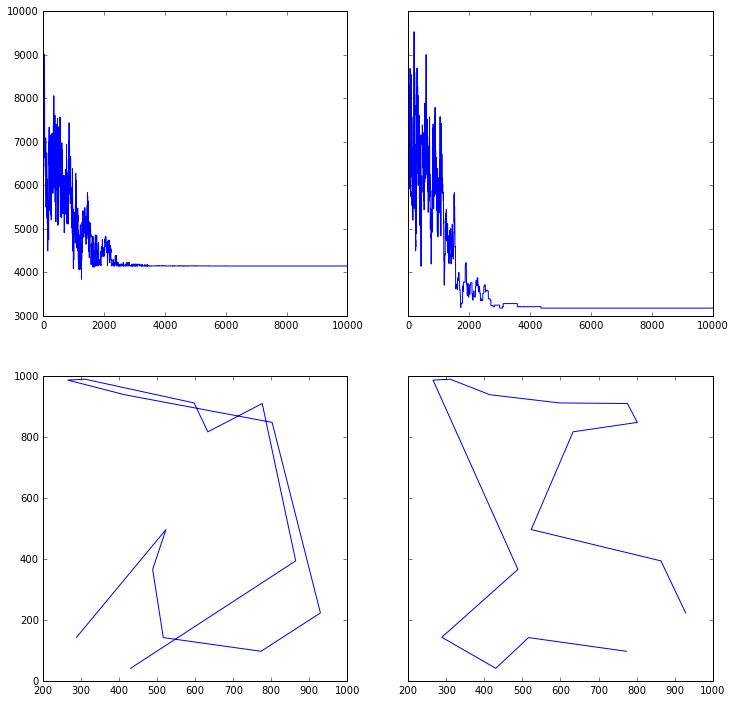

In [26]:
random.seed(0)

coords = [(random.randint(0,1000), random.randint(0,1000)) for i in range(15)]

best_path_original, best_cost_original, history_original = simulated_annealing_optimizer(coords, 
                                                                    distance, new_path, 1000, 0.01, 10000)
best_path_random, best_cost_random, history_random = simulated_annealing_optimizer(coords, 
                                                                    distance, new_path_random, 1000, 0.01, 10000)
print("Original:", best_cost_original)
print("Random:", best_cost_random)

fig, ax = plt.subplots(2,2, figsize=(12,12), sharey='row')
ax[0,0].plot([i['current_cost'] for i in history_original])
ax[1,0].plot([i[0] for i in best_path_original], [i[1] for i in best_path_original])

ax[0,1].plot([i['current_cost'] for i in history_random])
ax[1,1].plot([i[0] for i in best_path_random], [i[1] for i in best_path_random])

plt.show()

Original: 21908.07881814338
Random: 9568.080729433717


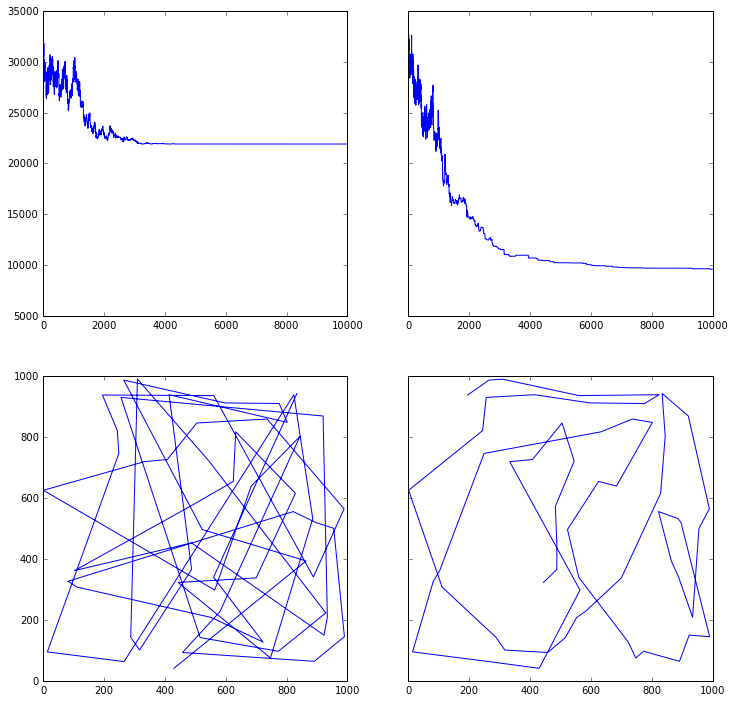

In [27]:
random.seed(0)

coords = [(random.randint(0,1000), random.randint(0,1000)) for i in range(60)]

best_path_original, best_cost_original, history_original = simulated_annealing_optimizer(coords, 
                                                                    distance, new_path, 1000, 0.01, 10000)
best_path_random, best_cost_random, history_random = simulated_annealing_optimizer(coords, 
                                                                    distance, new_path_random, 1000, 0.01, 10000)
print("Original:", best_cost_original)
print("Random:", best_cost_random)

fig, ax = plt.subplots(2,2, figsize=(12,12), sharey='row')
ax[0,0].plot([i['current_cost'] for i in history_original])
ax[1,0].plot([i[0] for i in best_path_original], [i[1] for i in best_path_original])

ax[0,1].plot([i['current_cost'] for i in history_random])
ax[1,1].plot([i[0] for i in best_path_random], [i[1] for i in best_path_random])

plt.show()

In [28]:
def select_best(population, cost_func, num_to_keep):
    scored_population = [(i, cost_func(i)) for i in population]
    scored_population.sort(key=lambda x: x[1])
    return [i[0] for i in scored_population[:num_to_keep]]

def recombine(population):
    # Randomly choose two parents
    options = list(range(len(population)))
    random.shuffle(options)
    partner1 = options[0]
    partner2 = options[1]
    # Choose a split point, take the first parents order to that split point, 
    # then the second parents order for all remaining points
    split_point = random.randint(0, len(population[0])-1)
    child = population[partner1][:split_point]
    for point in population[partner2]:
        if point not in child:
            child.append(point)
    return child


def genetic_algorithm_optimizer(starting_path, cost_func, new_path_func, pop_size, generations):
    # Create a starting population by randomly shuffling the points
    population = []
    for i in range(pop_size):
        new_path = starting_path[:]
        random.shuffle(new_path)
        population.append(new_path)
    history = []
    # Take the top 25% of routes and recombine to create new routes, repeating for generations
    for i in range(generations):
        pop_best = select_best(population, cost_func, int(pop_size / 4))
        new_population = []
        for i in range(pop_size):
            new_population.append(new_path_func(pop_best))
        population = new_population
        record = {'generation':i, 'current_cost':cost_func(population[0]),}
        history.append(record)
    return (population[0], cost_func(population[0]), history)

In [29]:
def recombine_mutant(population):
    # Randomly choose two parents
    options = list(range(len(population)))
    random.shuffle(options)
    partner1 = options[0]
    partner2 = options[1]
    # Choose a split point, take the first parents order to that split point, 
    # then the second parents order for all remaining points
    split_point = random.randint(0, len(population[0])-1)
    child = population[partner1][:split_point]
    for point in population[partner2]:
        if point not in child:
            child.append(point)
    return new_path(child)

Original: 2524.817502805437
Mutant: 2691.4617944034358


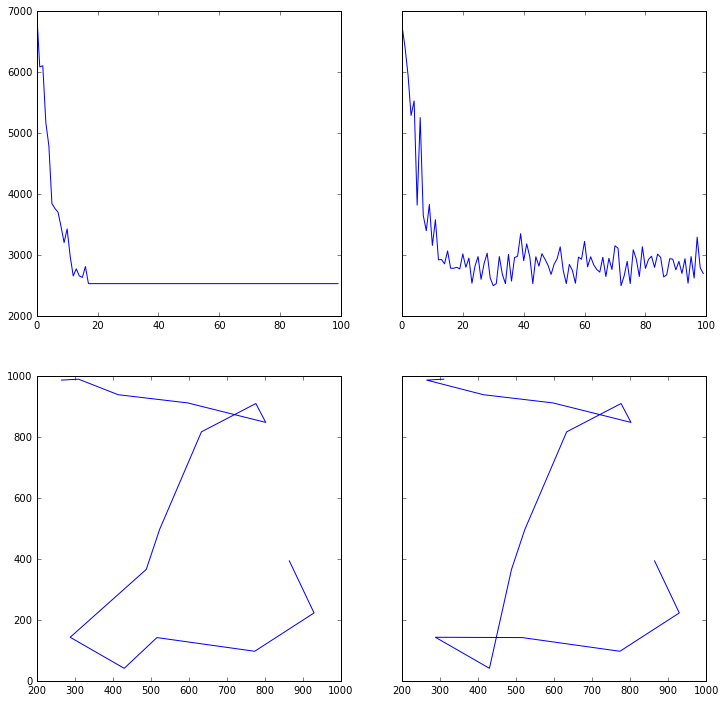

In [30]:
random.seed(0)

coords = [(random.randint(0,1000), random.randint(0,1000)) for i in range(15)]

best_path_original, best_cost_original, history_original = genetic_algorithm_optimizer(coords, 
                                                                    distance, recombine, 500, 100)
best_path_mutant, best_cost_mutant, history_mutant = genetic_algorithm_optimizer(coords, 
                                                                    distance, recombine_mutant, 500, 100)
print("Original:", best_cost_original)
print("Mutant:", best_cost_mutant)

fig, ax = plt.subplots(2,2, figsize=(12,12), sharey='row')
ax[0,0].plot([i['current_cost'] for i in history_original])
ax[1,0].plot([i[0] for i in best_path_original], [i[1] for i in best_path_original])

ax[0,1].plot([i['current_cost'] for i in history_mutant])
ax[1,1].plot([i[0] for i in best_path_mutant], [i[1] for i in best_path_mutant])

plt.show()

Original: 17145.499698878888
Mutant: 12200.130490826468


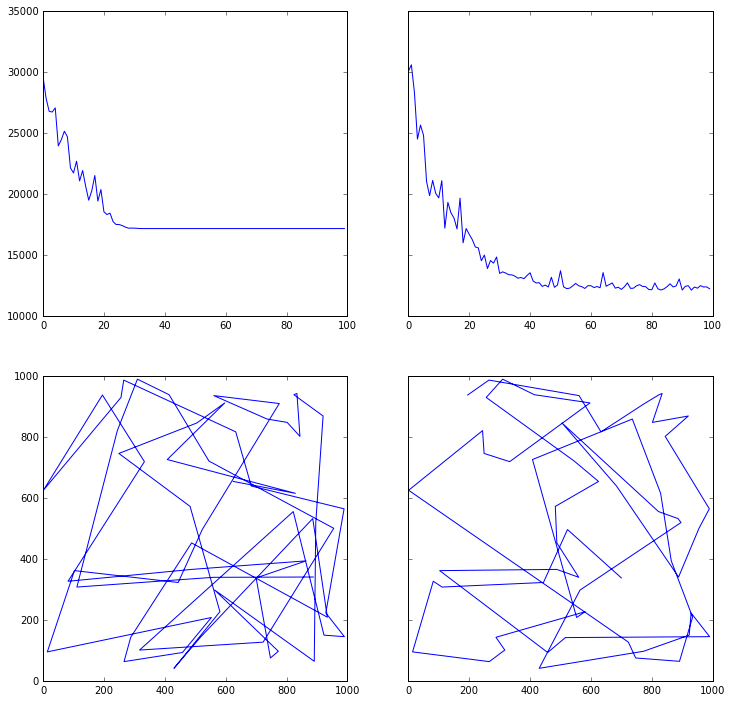

In [31]:
random.seed(0)

coords = [(random.randint(0,1000), random.randint(0,1000)) for i in range(60)]

best_path_original, best_cost_original, history_original = genetic_algorithm_optimizer(coords, 
                                                                    distance, recombine, 500, 100)
best_path_mutant, best_cost_mutant, history_mutant = genetic_algorithm_optimizer(coords, 
                                                                    distance, recombine_mutant, 500, 100)
print("Original:", best_cost_original)
print("Mutant:", best_cost_mutant)

fig, ax = plt.subplots(2,2, figsize=(12,12), sharey='row')
ax[0,0].plot([i['current_cost'] for i in history_original])
ax[1,0].plot([i[0] for i in best_path_original], [i[1] for i in best_path_original])

ax[0,1].plot([i['current_cost'] for i in history_mutant])
ax[1,1].plot([i[0] for i in best_path_mutant], [i[1] for i in best_path_mutant])

plt.show()